Source: Xavier Dupré

# Rappels sur scikit-learn et le machine learning

Quelques exercices simples sur *scikit-learn*. Le notebook est long pour ceux qui débutent en machine learning et sans doute sans suspens pour ceux qui en ont déjà fait.

In [ ]:
%matplotlib inline

## 1. Données synthétiques
<br>
<span style="color:blue">
    
**1. Simuler un jeu de données aléatoires de taille $(n, 2)$ avec ```numpy.random```.**

**2. Stocker l'échantillon dans une variable $X$.**

</span>
    

Par la suite, on pourra considérer que $X = (X_1, X_2)$



In [ ]:
import numpy as np

n = 1000
# X = ...
# print(X[:5])

A partir de $X$, calculer
$$ Y = 3 X_1-2X_2^2 + \epsilon$$ avec $\epsilon \in [0,1]$ 

In [ ]:
# y = ...
# print(y[:5])

## 2. Train, validation, test

Lorsque l'on entraine un modèle, il est d'usage de diviser le jeu de données d'entrainement en 2 parties:
- Une partie d'entrainement (*train set*), pour calibrer le modèle
- Une partie de validation (*validation set*), pour évaluer le modèle durant l'entrainement

Pour tester la capacité de généralisation du modèle, une fois l'entrainement sur le jeu d'entrainement terminé, on évalue le modèle sur:
- Un jeu d'évaluation (*test set*)

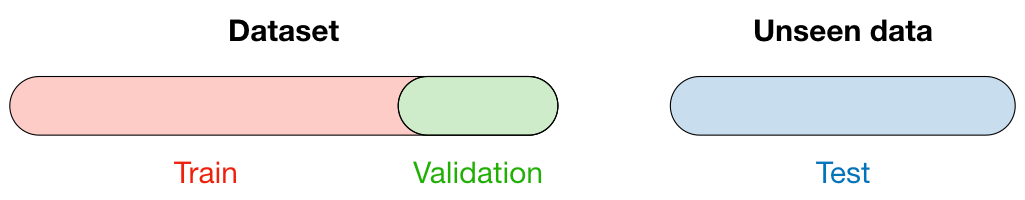
https://stanford.edu/~shervine/teaching/cs-229/cheatsheet-machine-learning-tips-and-tricks

<span style="color:blue">
    
**Réaliser cette répartition en jeu d'entrainement dans des variables $X_{train}, Y_{train}$ (```X_train, Y_train```)  et en jeu de validation $X_{test}, Y_{test}$ (```X_test, Y_test```) avec une répartition 80/20 (train/test).**
</span>


In [ ]:
# Avec sklearn
from sklearn.model_selection import train_test_split

#...

# print(X_train.shape, X_test.shape, y_train.shape,y_test.shape)

In [ ]:
# Sans sklearn

#...

# print(X_train.shape, X_test.shape, y_train.shape,y_test.shape)

## 3. Régression Linéaire
<br>

<span style="color:blue">

**Sur les données générées précédemment, calibrer une régression linéaire avec sklearn et calculer le coefficient $R^2$.**

</span>

$$\beta = (X^tX)^{-1} X^t y$$  
    


- Calibrer une régression linéaire

In [ ]:
from sklearn.linear_model import LinearRegression
# LR = ... 

* Afficher les coefficients du modèle

In [ ]:
# print(..., ...)

* Calculer le $R^2$

In [ ]:
from sklearn.metrics import r2_score
# ...


<span style="color:blue">

**Que pouvez-vous dire sur le choix du modèle (**Régression Linéaire**) au regard de la complexité des données ($Y = 3 X_1 - 2 X_2^2 + \epsilon$) ?**

</span>

## 4. Polynomial Features

<br>

→*Le modèle linéaire ne permet pas de capturer les effets non-linéaires ($X_2^2$) présents dans les variables explicatives.
Il convient alors d'effectuer une transformation $$Z = X_2^2$$ et de modéliser $$Y = 3 X_1 - 2 Z + \epsilon$$*

*Cette variable réponse est linéaire et peut être modélisée par une Régression Linéaire.*

*La fonction [```PolynomialFeatures```](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) permet d'effectuer cette transformation $Z = X_2^2$.*

<br>

<span style="color:blue">

**Utiliser ```PolynomialFeatures``` pour effectuer cette transformation.**
    
</span>


In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# ...

<span style="color:blue">

**Calibrer une régression linéaire sur les nouvelles données.**
    
</span>


In [ ]:
# LR2 = ...
# ...

<span style="color:blue">

**Calculer le $R^2$ et le comparer à celui du précédent modèle.**
    
</span>


In [ ]:
# ...

## 5. Forêt Aléatoire

<span style="color:blue">

**Calibrer une forêt aléatoire sur les données générées précédemment.**
    
</span>


In [ ]:
from sklearn.ensemble import RandomForestRegressor
# rf =  ...

<span style="color:blue">

**Donner le coefficient $R^2$ du modèle.**
    
</span>


In [ ]:
# ...

Le modèle linéaire est le meilleur modèle dans notre cas puisque les données ont été construites de la sorte. Il est attendu que le $R^2$ ne soit pas (significativement) plus élevé.

<span style="color:blue">

**Calibrer le modèle sur les features polynomiales.**
    
</span>


In [ ]:
# rf2 =  ...

## 6. Avec des nouvelles données
<br>
<span style="color:blue">

**Comparer les deux modèles sur les données suivantes. Que remarquez-vous ? Expliquez pourquoi ?**
    
</span>


In [ ]:
# ...

In [ ]:
# ...

Le seul modèle qui performe est la régression linéaire avec les features polynômiales. Comme il équivaut au modèle théorique, il est normal qu'il s'en approche, même si ses coefficients ne sont pas identiques au modèle théorique (il faudrait plus de données pour que cela converge).

## 6. Graphiques

Le nuage de points du premier et second jeu, les prédictions des deux modèles, une légende, un titre... avec [pandas](https://pandas.pydata.org/) ou directement avec [matplotlib](https://matplotlib.org/) au choix.

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import cm

# ...

<span style="color:blue">

**Tracer $Y$ pour $X_2$ fixé, puis $Y$ pour $X_1$ fixé**
    
</span>


In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(14, 4))

a, b = 0.9, 1.1
index1 = (X_test2[:, 0] >= a) & (X_test2[:, 0] <= b)
index2 = (X_test2[:, 1] >= a) & (X_test2[:, 1] <= b)
# ...

<span style="color:blue">

**Pour chaque modèle, tracer les prédictions sur le jeu X_test2 et ajouter une légende avec le nom de chaque modèle utilisé**
    
</span>


In [ ]:
# ...

Le graphe étudie les variables des modèles selon une coordonnées tout en restreignant l'autre dans un intervalle donné. On voit tout de suite que la forêt aléatoire devient constante au delà d'un certain seuil. C'est encore une fois tout à fait normal puisque la base d'apprentissage ne contient des $X_1, X_2$ que dans l'intervalle $[0, 1]$. En dehors, chaque arbre de décision produit une valeur constante tout simplement parce que ce sont des fonctions en escalier : une forêt aléatoire est une moyenne de fonctions en escalier, elle est bornée. Quant à la première régression linéaire, elle ne peut saisir les effets du second degré, elle est linéaire par rapport aux variables de départ. Elle s'écarte moins mais elle s'écarte quand même de la variable à prédire.

Cet exercice a pour but d'illustrer qu'un modèle de machine learning est estimé sur un jeu de données qui suit une certaine distribution. Lorsque les données sur lesquelles le modèle est utilisé pour prédire ne suivent plus cette loi, les modèles retournent des réponses qui ont toutes les chances d'être fausses et ce, de manière différente selon les modèles.

C'est pour cela qu'on dit qu'il faut réapprendre régulièrement les modèles de machine learning, surtout s'ils sont appliqués sur des données générées par l'activité humaine et non des données issues de problèmes physiques.

## 7. Overfitting

<br>

<span style="color:blue">

**Illuster le surapprentissage sur le jeu de données ```X_train``` en faisant varier la profondeur d'un arbre de décision**
    
</span>

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# ...

In [ ]:
# ...

## 8. Augmentation du nombre de features

<br>


<span style="color:blue">

**Observer l'impact de la régularisation des coefficients d'une régression logistique lorsque le nombre de features augmente.**
    
</span>


In [ ]:
from sklearn.linear_model import Ridge, Lasso
import numpy.linalg as nplin
import numpy

def coef_non_nuls(coef):
    return sum(numpy.abs(coef) > 0.001)

# ...

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
# ...

Numériquement, la régression linéaire devient difficile à estimer lorsque le nombre de features augmente. Théoriquement, il ne devrait pas y avoir de baisse de performances mais le graphe montre des erreurs évidentes. Cela se traduit par une norme des coefficients qui explose. La régularisation parvient à contraindre les modèles. 

La régression *Ridge* produira beaucoup de petits coefficients non nuls, la régression *Lasso* préfèrera concentrer la norme sur quelques coefficients seulement. Cette observation n'est vraie que dans le cas d'une régression linéaire avec une erreur quadratique.